In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!unzip train_posters.zip
!unzip test_posters.zip

Archive:  train_posters.zip
replace train_posters/100114.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  test_posters.zip
replace test_posters/100388.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import os
import cv2
import matplotlib.pyplot as plt

# Read csv data
# Reorder the labels to match the order of the images

csv_data = pd.read_csv('train_data.csv').as_matrix()

csv_data = csv_data[csv_data[:,1].argsort()] # csv_data[:,1].argsort() returns indices that sort movies by imdb # 
genres = csv_data[:,-1]


test_data_csv = pd.read_csv('test_data.csv').as_matrix()

# One-hot encode genres column

train_labels = to_categorical(np.array(genres))
print("Label for first training example: {}".format(genres[0]))
print("One-hot encoded label for first training example: {}".format(train_labels[0]))

Using TensorFlow backend.


Label for first training example: 3
One-hot encoded label for first training example: [0. 0. 0. 1.]


In [0]:
train_data = 'train_posters'
test_data = 'test_posters'

def preprocess_training_data():
    train_images = []
    image_num = 0

    for ind,i in enumerate(csv_data[:,1]):

        path = os.path.join(train_data,str(i) + ".jpg")
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))

        train_images.append(np.array(img)/255)
    return train_images


def preprocess_test_data():
    test_images = []
    for ind,i in enumerate(test_data_csv[:,1]):

        path = os.path.join(test_data,str(i) + ".jpg")
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        test_images.append(np.array(img)/255)
            
    return test_images
    
preprocessed_train = preprocess_training_data()
preprocessed_test = preprocess_test_data()


x_train = np.array(preprocessed_train).reshape(-1,64,64,1)
y_train = train_labels

x_test = np.array(preprocessed_test).reshape(-1,64,64,1)

In [0]:
# Display training example #1371 Death Note, a well-acclaimed Hollywood adaption of the Death Note anime (jk)
# Display movie poster and associated label and title

# Feel free to change the train_ind and see how the preprocessing affect the images
train_ind = 1371
plt.imshow(preprocessed_train[train_ind])
print(csv_data[:,1][train_ind])
print(y_train[train_ind])
print(csv_data[:,(3,4,5)])

In [0]:
# Displaying test example #200 
# Remember there is no genre label or title associated with this image
# We are trying to predict the labels! 

plt.imshow(preprocessed_test[200])
print("Test example #200")

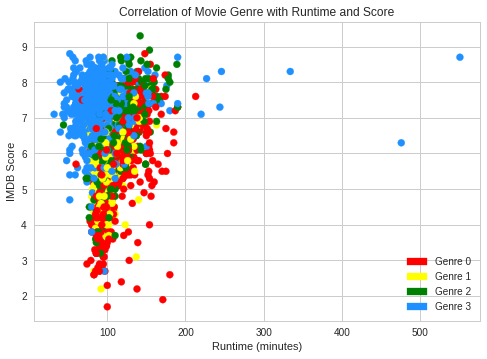

In [0]:
# Visualization of Training Data

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

colors = ['red','yellow','green','dodgerblue']
plt.scatter(csv_data[:,4], csv_data[:,5], s=None, c=genre_list, marker=None, cmap=matplotlib.colors.ListedColormap(colors))
matplotlib.pyplot.xlabel('Runtime (minutes)')
matplotlib.pyplot.ylabel('IMDB Score')
matplotlib.pyplot.title('Correlation of Movie Genre with Runtime and Score')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Genre 0')
yellow_patch = mpatches.Patch(color='yellow', label='Genre 1')
green_patch = mpatches.Patch(color='green', label='Genre 2')
blue_patch = mpatches.Patch(color='dodgerblue', label='Genre 3')
plt.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch])

plt.show()

Text(0.5,1,'Correlation of Movie Genre with Runtime and Score')

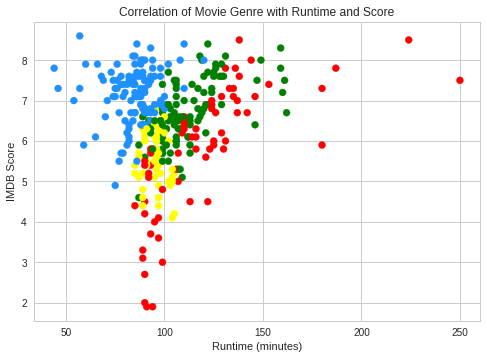

In [0]:
# Visualization of KNN prediction

from sklearn.neighbors import KNeighborsClassifier

genre_list = genres.tolist()

# KNN for runtime and score

neigh = KNeighborsClassifier(n_neighbors=23)
neigh.fit(csv_data[:,(4,5)], genre_list)
neigh_predict = neigh.predict(test_data_csv[:,(4,5)])  # neigh_predict is the KNN prediction for test data


# COMBINE CNN and KNN
# one_hot = to_categorical(neigh_predict)*0.7 # one-hot encode neigh_predict and multiply by 0.4 (maybe a diff value will work better, idk)
# k_predict = one_hot + predict # Add one_hot and predict (output from the conv neural network)

colors = ['red','yellow','green','dodgerblue']
plt.scatter(test_data_csv[:,4], test_data_csv[:,5], s=None, c=neigh_predict, marker=None, cmap=matplotlib.colors.ListedColormap(colors))
matplotlib.pyplot.xlabel('Runtime (minutes)')
matplotlib.pyplot.ylabel('IMDB Score')
matplotlib.pyplot.title('Correlation of Movie Genre with Runtime and Score')